In [2]:
import pandas as pd

# CSVファイルをインポート（2行目が単位行なのでスキップ）
df = pd.read_csv('data/20260213_FSW_FL5/20260213_FSW_FL5.csv', skiprows=[1])

# 数値カラムに変換
for col in df.columns:
    df[col] = pd.to_numeric(df[col], errors='coerce')

df.head()

,Time,Distance,Corr Dist,Corr Dist (Unstretched),Corr Speed,ABS Active,ABS Enabled,AID Allow Tire Blankets,AID Auto Blip,AID Auto Clutch,...,Toe In FR,Toe In RL,Toe In RR,Turbo Boost,Wheel Angular Speed FL,Wheel Angular Speed FR,Wheel Angular Speed RL,Wheel Angular Speed RR,Wind Direction,Wind Speed
0,0.000,0,0,0,233.4,0.0,1.0,0.0,1.0,1.0,...,-0.011,0.11865,0.11878,1.2251,189.52,189.52,189.51,189.52,-186,0
1,0.017,1,1,1,233.4,0.0,1.0,0.0,1.0,1.0,...,-0.011,0.11988,0.12040,1.1581,189.44,189.44,189.45,189.46,-186,0
2,0.033,2,2,2,233.3,0.0,1.0,0.0,1.0,1.0,...,-0.011,0.12143,0.12178,1.0947,189.38,189.38,189.40,189.40,-186,0
3,0.050,3,3,3,233.3,0.0,1.0,0.0,1.0,1.0,...,-0.011,0.12240,0.12268,1.0446,189.33,189.34,189.35,189.36,-186,0
4,0.067,4,4,4,233.2,0.0,1.0,0.0,1.0,1.0,...,-0.011,0.12377,0.12407,0.9874,189.28,189.28,189.30,189.30,-186,0


In [3]:
df.columns.tolist()

['Time',
 'Distance',
 'Corr Dist',
 'Corr Dist (Unstretched)',
 'Corr Speed',
 'ABS Active',
 'ABS Enabled',
 'AID Allow Tire Blankets',
 'AID Auto Blip',
 'AID Auto Clutch',
 'AID Auto Shift',
 'AID Fuel Rate',
 'AID Ideal Line',
 'AID Mech Damage',
 'AID Stability',
 'AID Tire Wear Rate',
 'Air Density',
 'Air Temp',
 'Ballast',
 'Best Lap Delta',
 'Best Lap Time',
 'Brake Bias',
 'Brake Pos',
 'Brake Temp FL',
 'Brake Temp FR',
 'Brake Temp RL',
 'Brake Temp RR',
 'CG Accel Lateral',
 'CG Accel Longitudinal',
 'CG Accel Vertical',
 'CG Height',
 'Camber FL',
 'Camber FR',
 'Camber RL',
 'Camber RR',
 'Car Coord X',
 'Car Coord Y',
 'Car Coord Z',
 'Car Damage Front',
 'Car Damage Left',
 'Car Damage Rear',
 'Car Damage Right',
 'Car Pos Norm',
 'Caster FL',
 'Caster FR',
 'Chassis Pitch Angle',
 'Chassis Pitch Rate',
 'Chassis Roll Angle',
 'Chassis Roll Rate',
 'Chassis Velocity X',
 'Chassis Velocity Y',
 'Chassis Velocity Z',
 'Chassis Yaw Rate',
 'Clutch Pos',
 'DRS Active',
 '

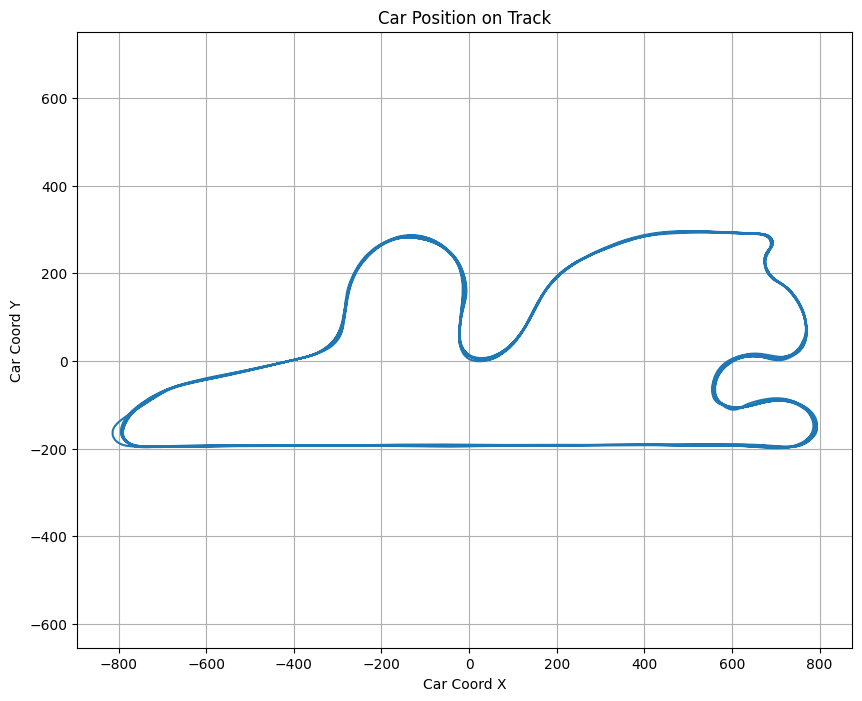

In [4]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
plt.plot(df['Car Coord X'], df['Car Coord Y'])
plt.xlabel('Car Coord X')
plt.ylabel('Car Coord Y')
plt.title('Car Position on Track')
plt.axis('equal')
plt.grid(True)
plt.show()

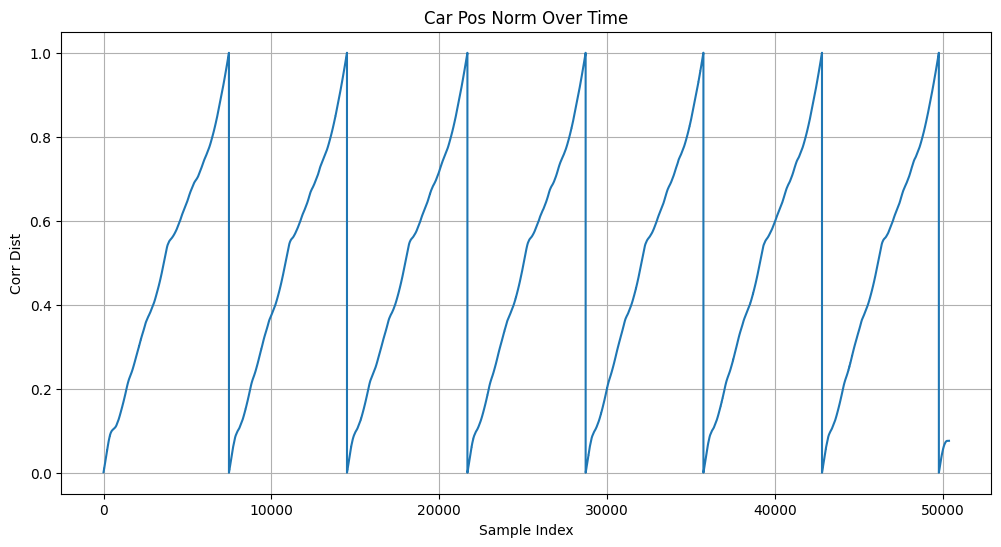

In [5]:
plt.figure(figsize=(12, 6))
plt.plot(df['Car Pos Norm'])
plt.xlabel('Sample Index')
plt.ylabel('Corr Dist')
plt.title('Car Pos Norm Over Time')
plt.grid(True)
plt.show()

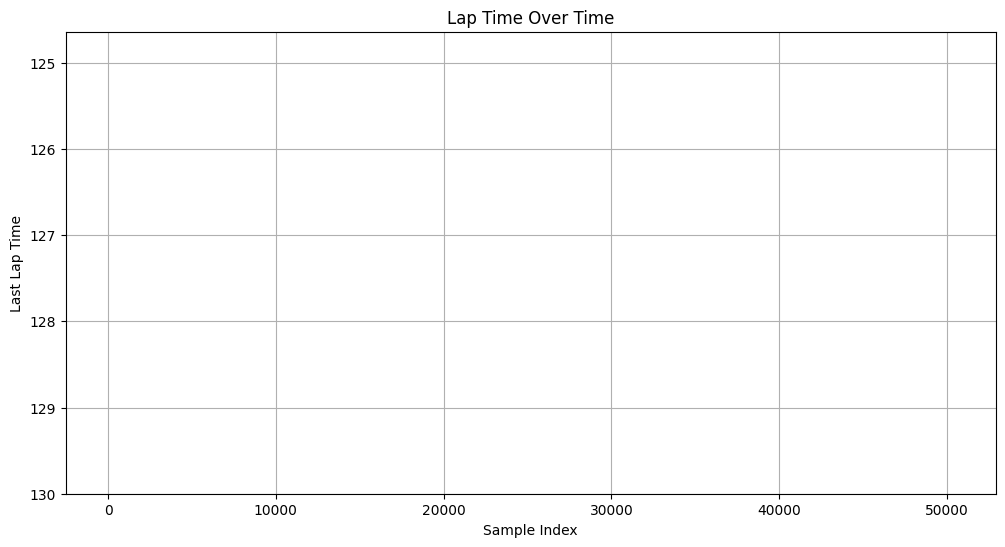

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(df["Last Lap Time"])
plt.xlabel("Sample Index")
plt.ylabel("Last Lap Time")
plt.ylim(110, df["Last Lap Time"].max() + 1)
plt.title("Lap Time Over Time")
plt.grid(True)
plt.show()

In [7]:
# Get unique values from Last Lap Time column and display them
unique_lap_times = df['Last Lap Time'].unique()
print(f"Number of unique lap times: {len(unique_lap_times)}")
print("\nUnique lap times:")
print(sorted(unique_lap_times))

Number of unique lap times: 9

Unique lap times:
[np.float64(0.0), np.float64(116.07), np.float64(116.97), np.float64(117.23), np.float64(117.42), np.float64(117.77), np.float64(119.64), np.float64(124.64), np.float64(nan)]


In [8]:
# Last Lap Timeの変化点でラップ境界を検出し、ラップごとに分割
lap_change = df['Last Lap Time'].ne(df['Last Lap Time'].shift()).cumsum()
laps = {f"Lap {i}": group.reset_index(drop=True) for i, (_, group) in enumerate(df.groupby(lap_change), 1)}

print(f"ラップ数: {len(laps)}")
for name, lap_df in laps.items():
    lap_time = lap_df['Last Lap Time'].iloc[-1]
    print(f"  {name}: {len(lap_df)} rows, Last Lap Time = {lap_time}")

ラップ数: 9
  Lap 1: 7477 rows, Last Lap Time = 0.0
  Lap 2: 7034 rows, Last Lap Time = 124.64
  Lap 3: 7178 rows, Last Lap Time = 117.23
  Lap 4: 7044 rows, Last Lap Time = 119.64
  Lap 5: 7019 rows, Last Lap Time = 117.42
  Lap 6: 7066 rows, Last Lap Time = 116.97
  Lap 7: 6964 rows, Last Lap Time = 117.77
  Lap 8: 601 rows, Last Lap Time = 116.07
  Lap 9: 1 rows, Last Lap Time = nan


In [10]:
# ベストラップを自動選択（Last Lap Timeが100〜200秒 かつ 十分なサンプル数のもの）
best_lap_name = None
best_lap_time = float('inf')
for name, lap_df in laps.items():
    lt = lap_df['Last Lap Time'].iloc[-1]
    if 100 < lt < 200 and len(lap_df) > 3000 and lt < best_lap_time:
        best_lap_time = lt
        best_lap_name = name

print(f"ベストラップ: {best_lap_name} ({best_lap_time:.2f}s)")
df6 = laps[best_lap_name]
print(f"サンプル数: {len(df6)}")

ベストラップ: Lap 6 (116.97s)
サンプル数: 7066


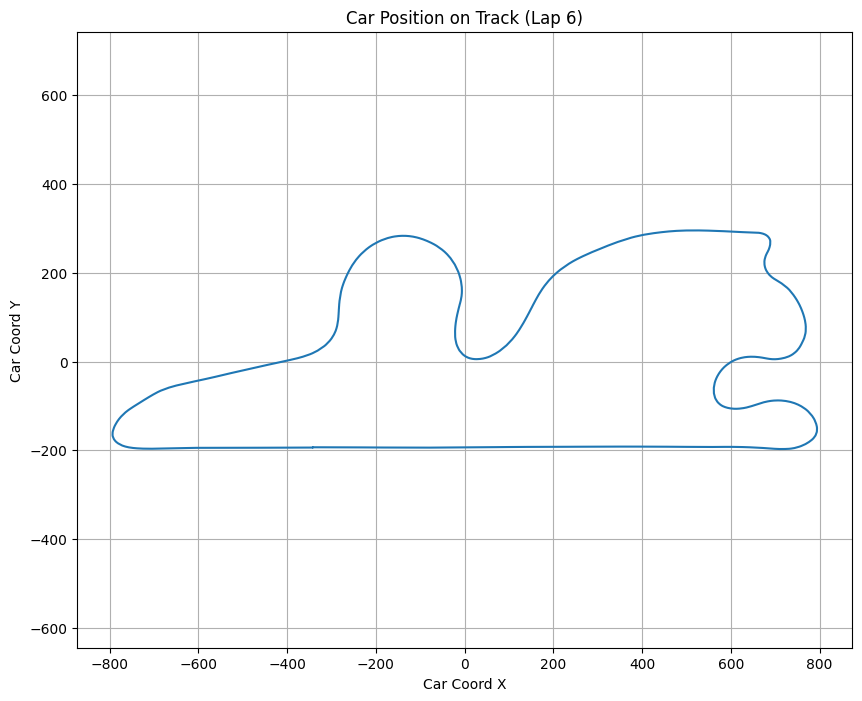

In [11]:
# トラックマップ
plt.figure(figsize=(10, 8))
plt.plot(df6['Car Coord X'], df6['Car Coord Y'])
plt.xlabel('Car Coord X')
plt.ylabel('Car Coord Y')
plt.title(f'Car Position on Track ({best_lap_name})')
plt.axis('equal')
plt.grid(True)
plt.show()

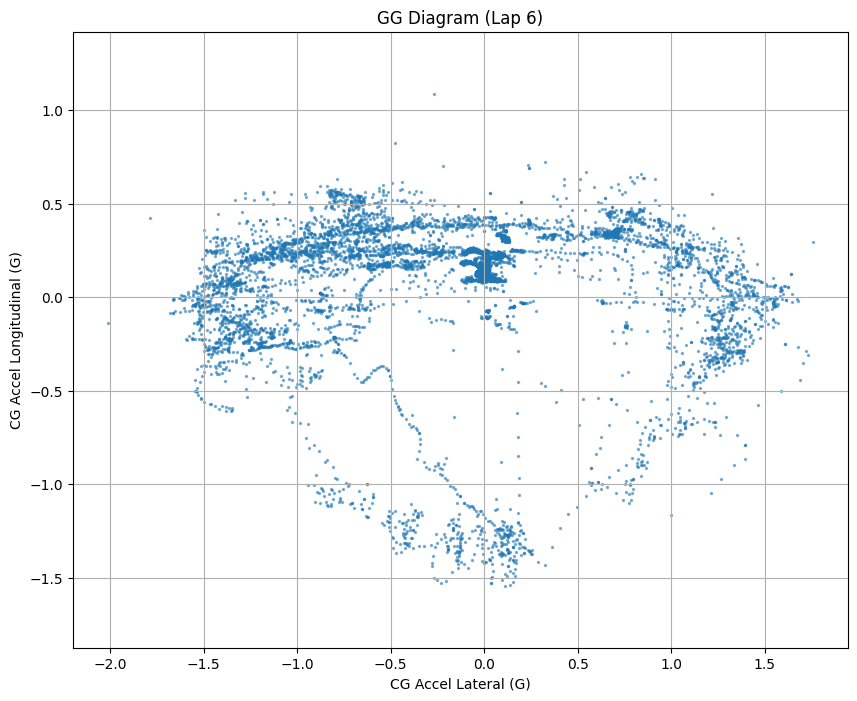

In [12]:
# GGダイアグラム（scatter）
plt.figure(figsize=(10, 8))
plt.scatter(df6['CG Accel Lateral'], df6['CG Accel Longitudinal'], s=2, alpha=0.5)
plt.xlabel('CG Accel Lateral (G)')
plt.ylabel('CG Accel Longitudinal (G)')
plt.title(f'GG Diagram ({best_lap_name})')
plt.axis('equal')
plt.grid(True)
plt.show()

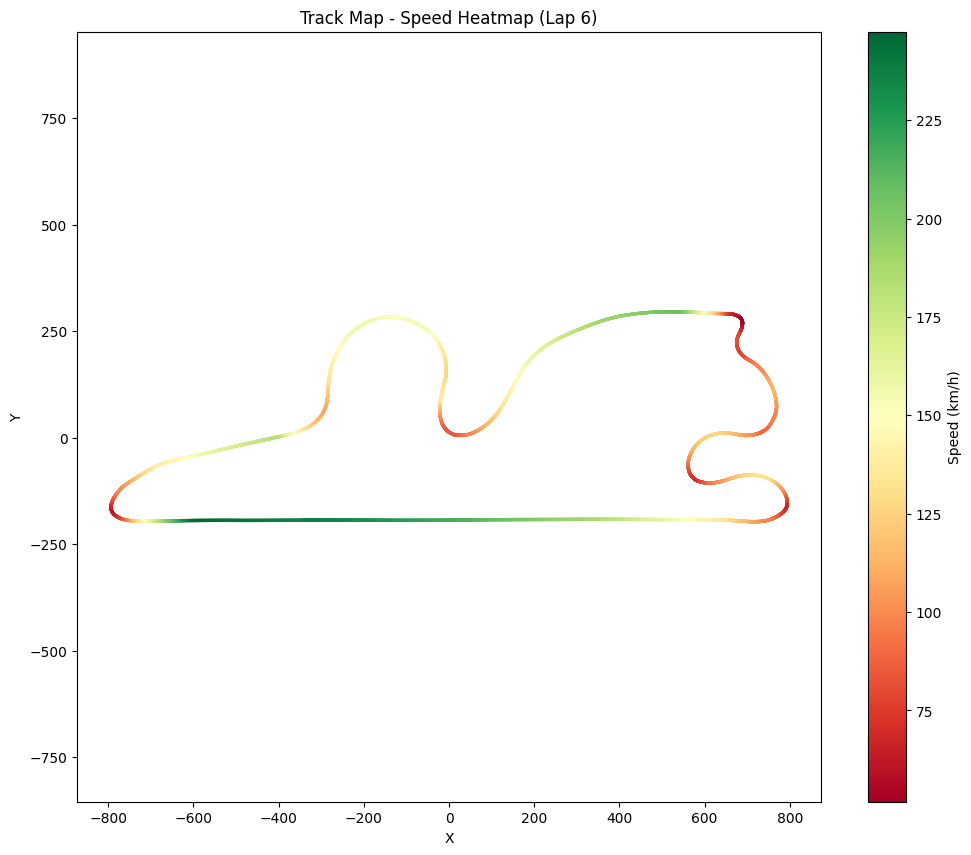

In [13]:
import numpy as np

# トラックマップ + 速度ヒートマップ
fig, ax = plt.subplots(figsize=(12, 10))
scatter = ax.scatter(df6['Car Coord X'], df6['Car Coord Y'],
                     c=df6['Corr Speed'], cmap='RdYlGn', s=2)
plt.colorbar(scatter, label='Speed (km/h)')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_title(f'Track Map - Speed Heatmap ({best_lap_name})')
ax.axis('equal')
plt.show()

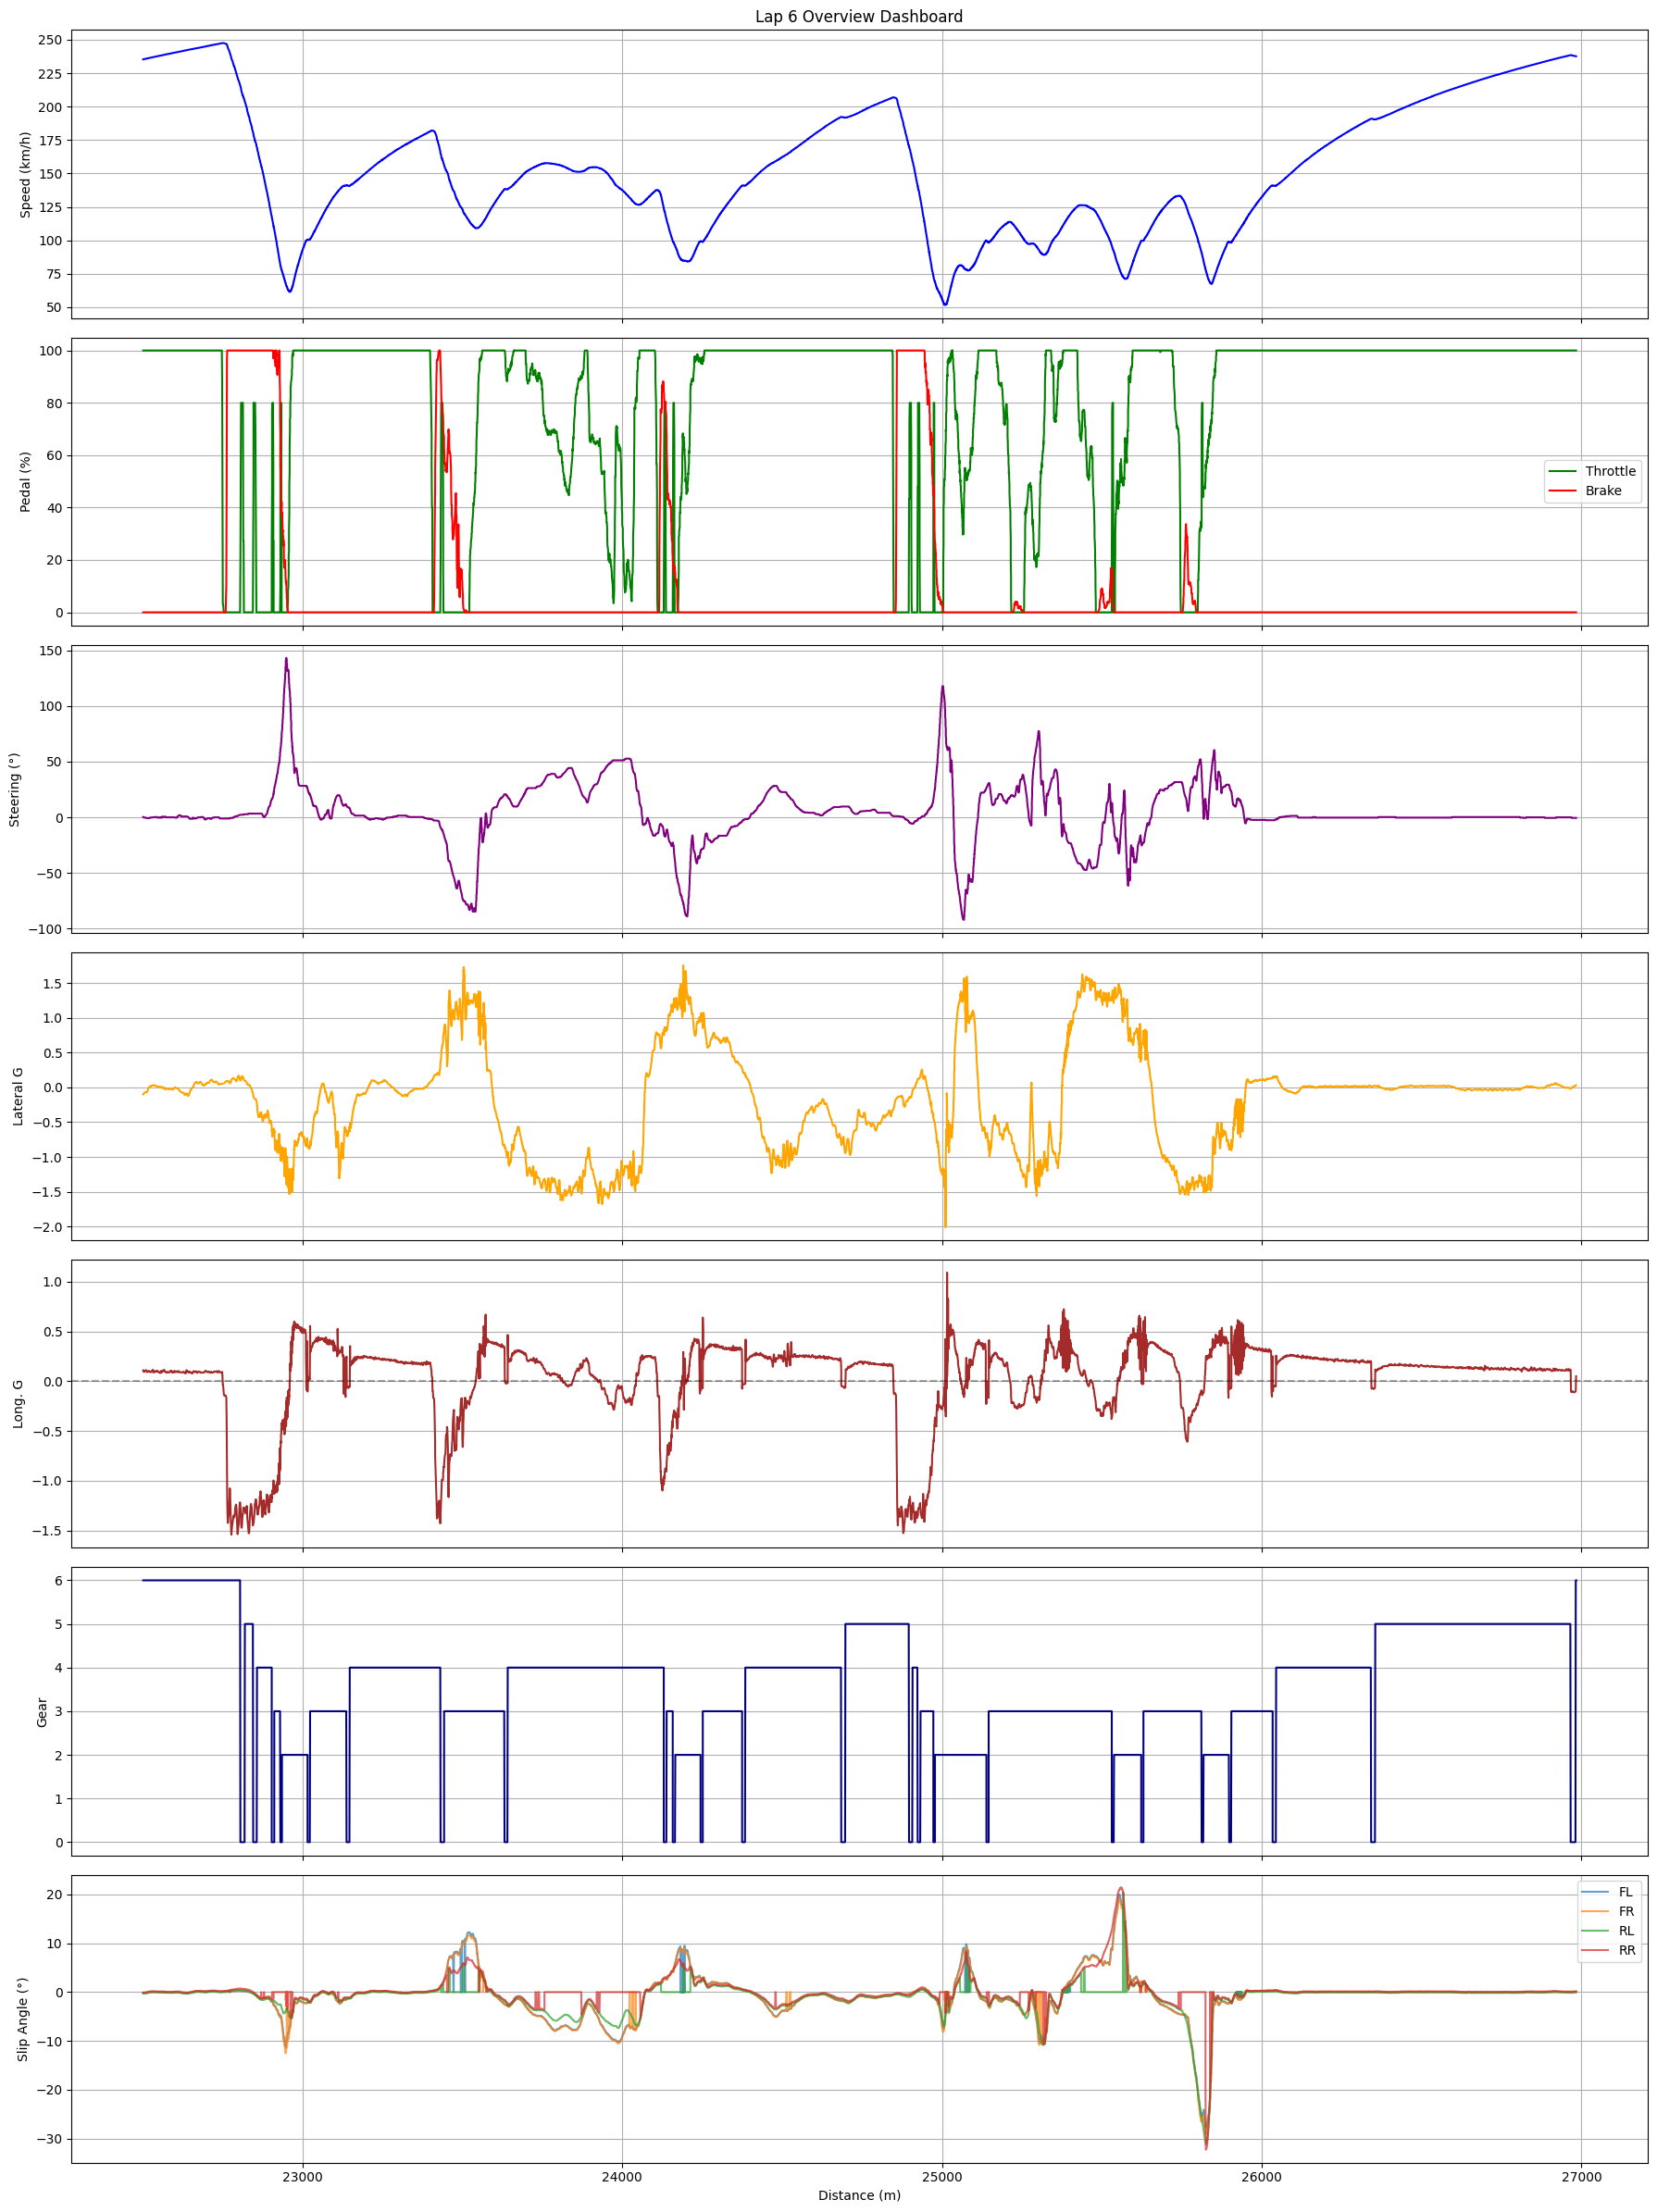

In [14]:
# === 総合ダッシュボード ===
fig, axes = plt.subplots(7, 1, figsize=(18, 24), sharex=True)

axes[0].plot(df6['Corr Dist'], df6['Corr Speed'], color='blue')
axes[0].set_ylabel('Speed (km/h)')
axes[0].set_title(f'{best_lap_name} Overview Dashboard')

axes[1].plot(df6['Corr Dist'], df6['Throttle Pos'], color='green', label='Throttle')
axes[1].plot(df6['Corr Dist'], df6['Brake Pos'], color='red', label='Brake')
axes[1].set_ylabel('Pedal (%)')
axes[1].legend()

axes[2].plot(df6['Corr Dist'], df6['Steering Angle'], color='purple')
axes[2].set_ylabel('Steering (°)')

axes[3].plot(df6['Corr Dist'], df6['CG Accel Lateral'], color='orange')
axes[3].set_ylabel('Lateral G')

axes[4].plot(df6['Corr Dist'], df6['CG Accel Longitudinal'], color='brown')
axes[4].axhline(y=0, color='black', linestyle='--', alpha=0.3)
axes[4].set_ylabel('Long. G')

axes[5].plot(df6['Corr Dist'], df6['Gear'], color='navy')
axes[5].set_ylabel('Gear')

axes[6].plot(df6['Corr Dist'], df6['Tire Slip Angle FL'], label='FL', alpha=0.7)
axes[6].plot(df6['Corr Dist'], df6['Tire Slip Angle FR'], label='FR', alpha=0.7)
axes[6].plot(df6['Corr Dist'], df6['Tire Slip Angle RL'], label='RL', alpha=0.7)
axes[6].plot(df6['Corr Dist'], df6['Tire Slip Angle RR'], label='RR', alpha=0.7)
axes[6].set_ylabel('Slip Angle (°)')
axes[6].set_xlabel('Distance (m)')
axes[6].legend()

for ax in axes:
    ax.grid(True)

plt.tight_layout()
plt.show()

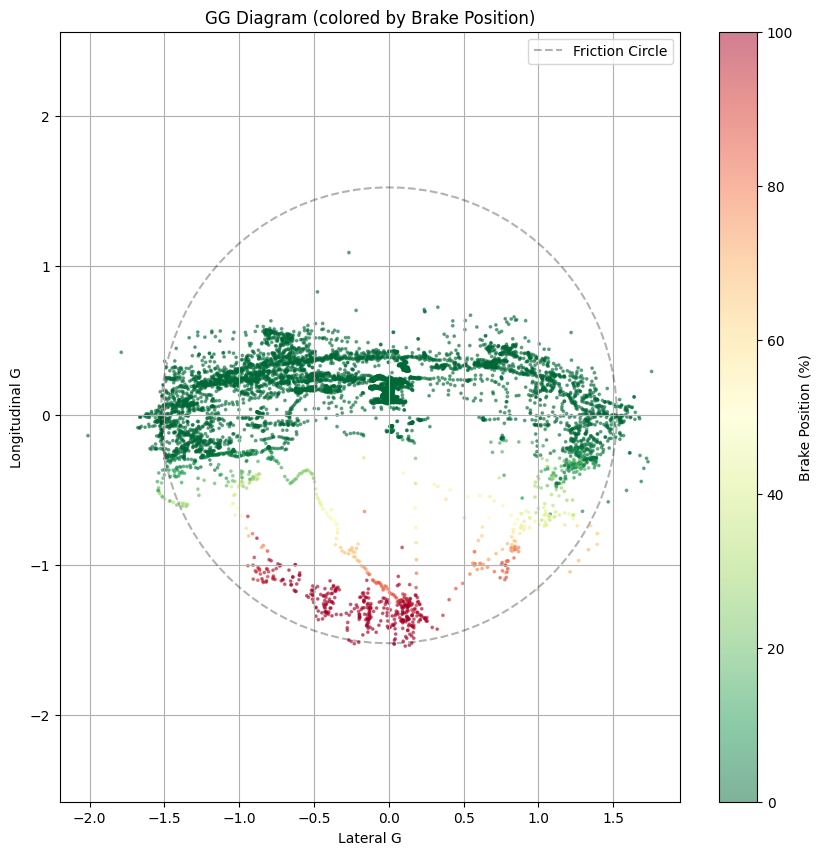

In [15]:
# === GGダイアグラム（ブレーキ位置カラー + フリクションサークル）===
fig, ax = plt.subplots(figsize=(10, 10))
scatter = ax.scatter(df6['CG Accel Lateral'], df6['CG Accel Longitudinal'],
                     c=df6['Brake Pos'], cmap='RdYlGn_r', s=3, alpha=0.5)
plt.colorbar(scatter, label='Brake Position (%)')

theta = np.linspace(0, 2*np.pi, 100)
max_g = max(abs(df6['CG Accel Lateral']).quantile(0.98),
            abs(df6['CG Accel Longitudinal']).quantile(0.98))
ax.plot(max_g * np.cos(theta), max_g * np.sin(theta), 'k--', alpha=0.3, label='Friction Circle')

ax.set_xlabel('Lateral G')
ax.set_ylabel('Longitudinal G')
ax.set_title('GG Diagram (colored by Brake Position)')
ax.axis('equal')
ax.grid(True)
ax.legend()
plt.show()

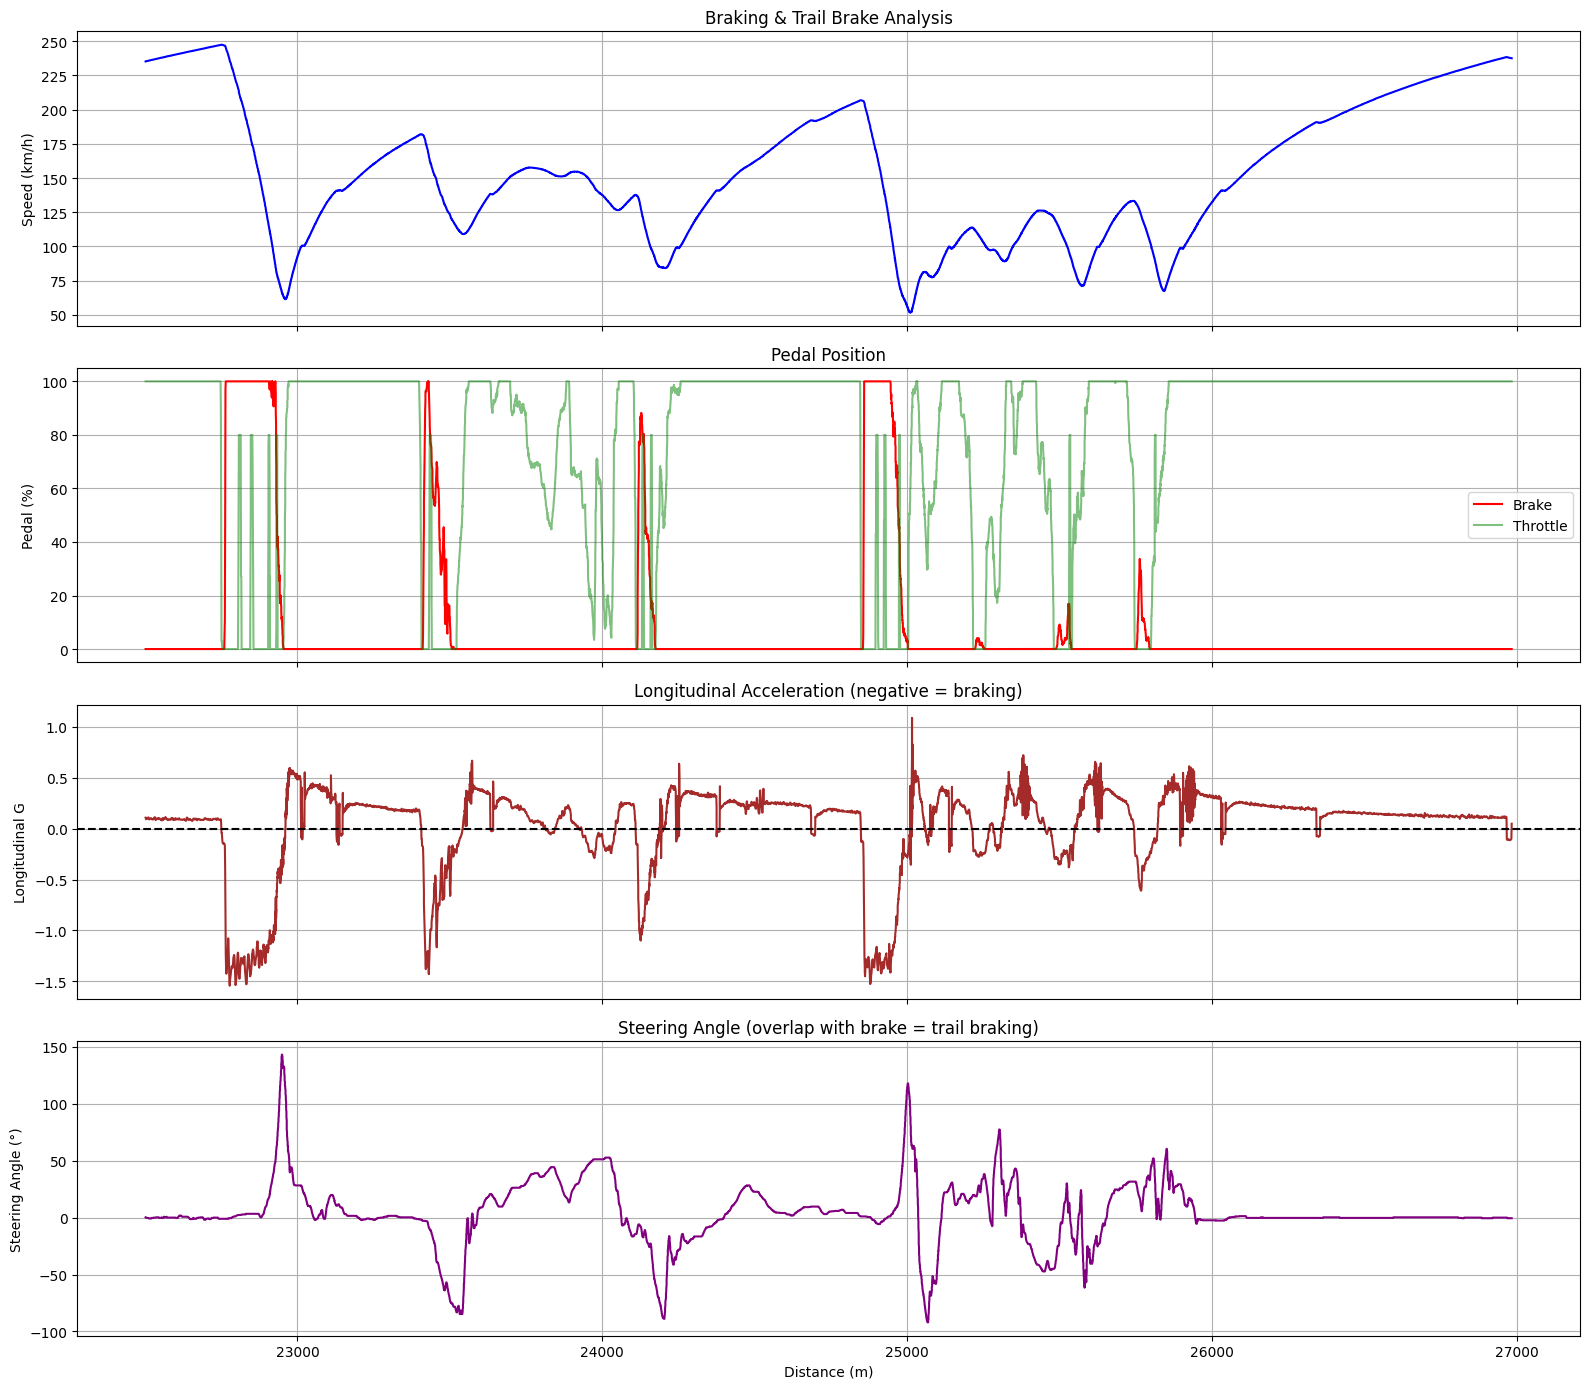

In [16]:
# === ブレーキング・トレイルブレーキ分析 ===
fig, axes = plt.subplots(4, 1, figsize=(16, 14), sharex=True)

axes[0].plot(df6['Corr Dist'], df6['Corr Speed'], color='blue')
axes[0].set_ylabel('Speed (km/h)')
axes[0].set_title('Braking & Trail Brake Analysis')
axes[0].grid(True)

axes[1].plot(df6['Corr Dist'], df6['Brake Pos'], color='red', label='Brake')
axes[1].plot(df6['Corr Dist'], df6['Throttle Pos'], color='green', alpha=0.5, label='Throttle')
axes[1].set_ylabel('Pedal (%)')
axes[1].set_title('Pedal Position')
axes[1].legend()
axes[1].grid(True)

axes[2].plot(df6['Corr Dist'], df6['CG Accel Longitudinal'], color='brown')
axes[2].axhline(y=0, color='black', linestyle='--')
axes[2].set_ylabel('Longitudinal G')
axes[2].set_title('Longitudinal Acceleration (negative = braking)')
axes[2].grid(True)

axes[3].plot(df6['Corr Dist'], df6['Steering Angle'], color='purple')
axes[3].set_ylabel('Steering Angle (°)')
axes[3].set_title('Steering Angle (overlap with brake = trail braking)')
axes[3].set_xlabel('Distance (m)')
axes[3].grid(True)

plt.tight_layout()
plt.show()

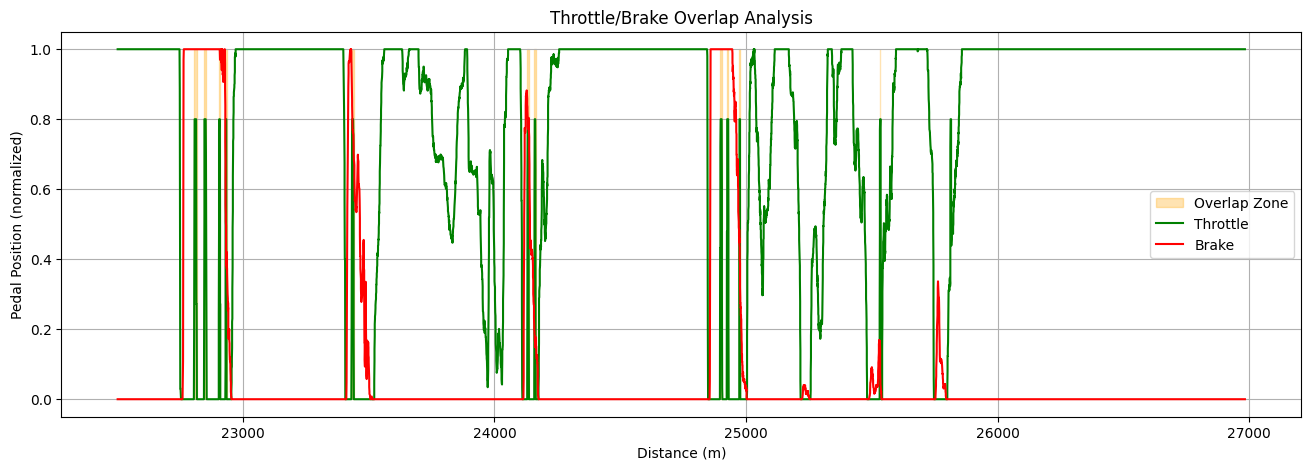

ペダルオーバーラップ率: 1.7%


In [17]:
# === スロットル/ブレーキ オーバーラップ分析 ===
overlap = (df6['Throttle Pos'] > 5) & (df6['Brake Pos'] > 5)

fig, ax = plt.subplots(figsize=(16, 5))
ax.fill_between(df6['Corr Dist'], 0, 1, where=overlap,
                alpha=0.3, color='orange', label='Overlap Zone')
ax.plot(df6['Corr Dist'], df6['Throttle Pos']/100, label='Throttle', color='green')
ax.plot(df6['Corr Dist'], df6['Brake Pos']/100, label='Brake', color='red')
ax.set_xlabel('Distance (m)')
ax.set_ylabel('Pedal Position (normalized)')
ax.set_title('Throttle/Brake Overlap Analysis')
ax.legend()
ax.grid(True)
plt.show()

overlap_pct = overlap.sum() / len(df6) * 100
print(f"ペダルオーバーラップ率: {overlap_pct:.1f}%")

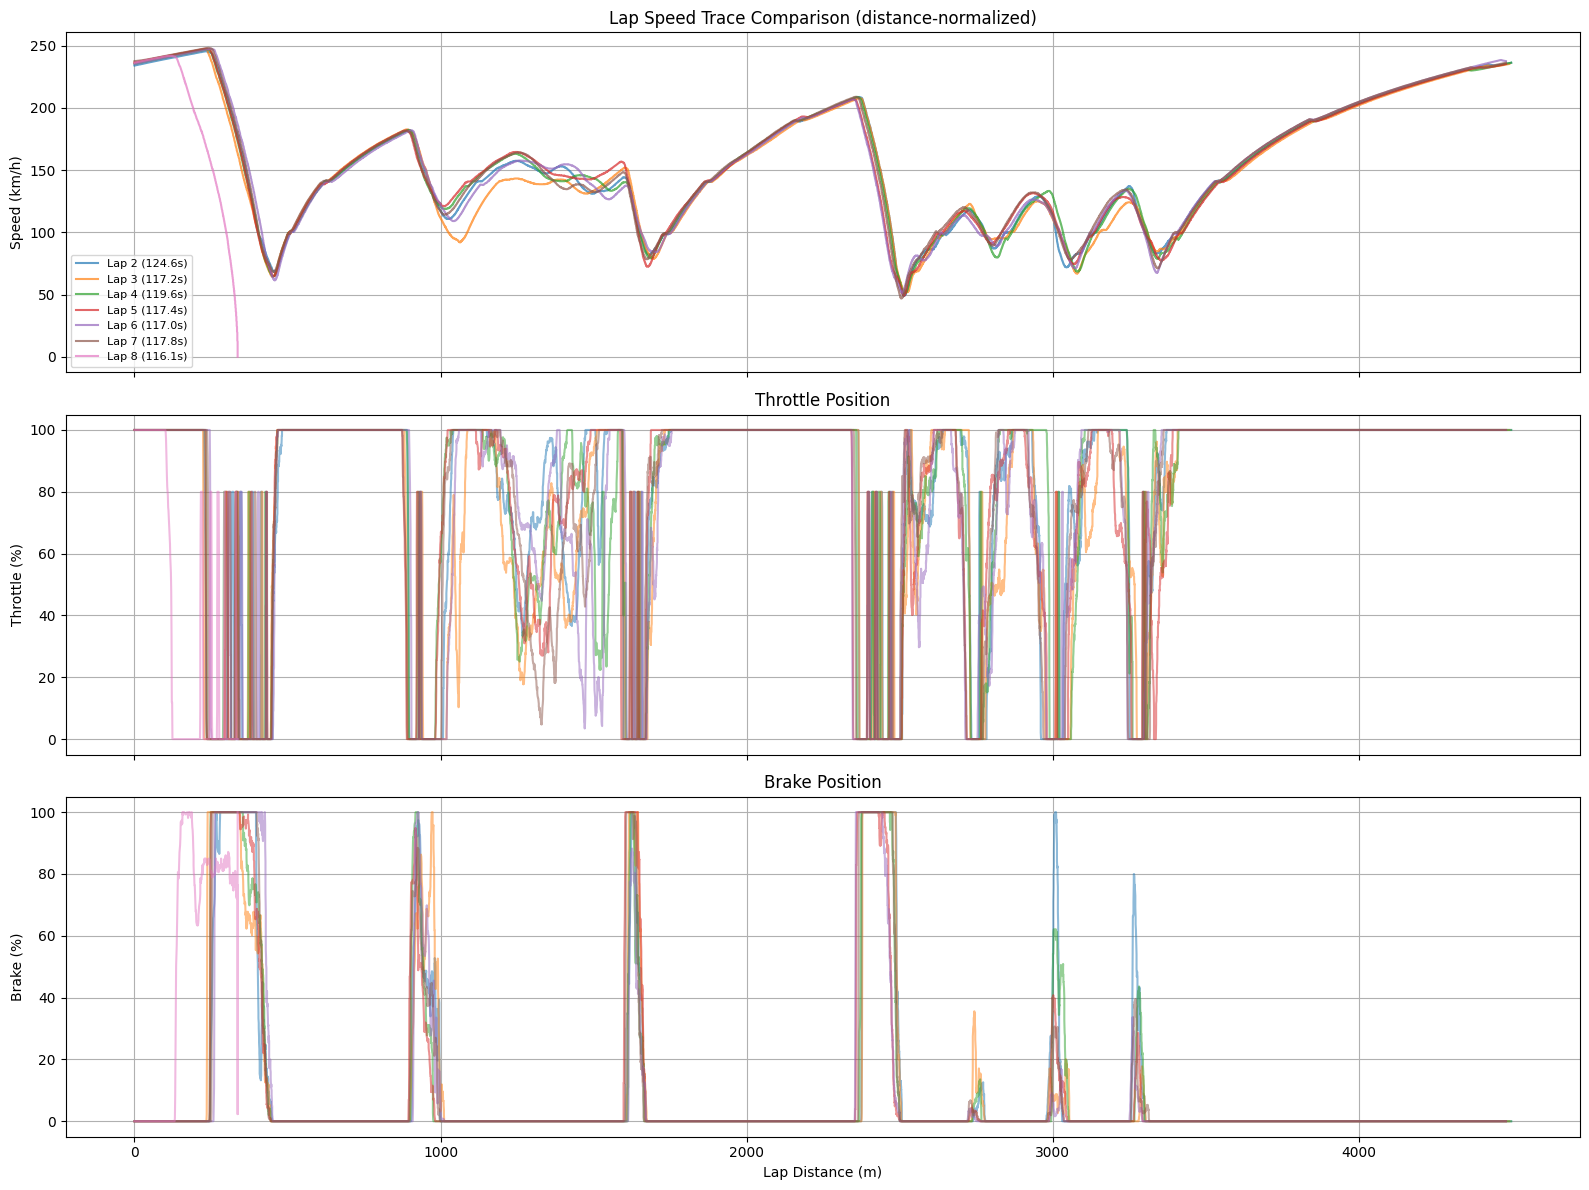

In [18]:
# === ラップ間速度トレース比較（距離を正規化して重ね比較）===
fig, axes = plt.subplots(3, 1, figsize=(16, 12), sharex=True)

for name, lap_df in laps.items():
    lt = lap_df['Last Lap Time'].iloc[-1]
    if lt > 100 and lt < 200:
        # ラップ内の相対距離に変換
        lap_dist = lap_df['Corr Dist'] - lap_df['Corr Dist'].iloc[0]
        axes[0].plot(lap_dist, lap_df['Corr Speed'],
                     label=f"{name} ({lt:.1f}s)", alpha=0.7)
        axes[1].plot(lap_dist, lap_df['Throttle Pos'], label=name, alpha=0.5)
        axes[2].plot(lap_dist, lap_df['Brake Pos'], label=name, alpha=0.5)

axes[0].set_ylabel('Speed (km/h)')
axes[0].set_title('Lap Speed Trace Comparison (distance-normalized)')
axes[0].legend(fontsize=8)
axes[0].grid(True)

axes[1].set_ylabel('Throttle (%)')
axes[1].set_title('Throttle Position')
axes[1].grid(True)

axes[2].set_ylabel('Brake (%)')
axes[2].set_xlabel('Lap Distance (m)')
axes[2].set_title('Brake Position')
axes[2].grid(True)

plt.tight_layout()
plt.show()

In [ ]:
# === タイヤスリップアングル vs 荷重 ===
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
tires = [('FL', 'Front Left'), ('FR', 'Front Right'), ('RL', 'Rear Left'), ('RR', 'Rear Right')]

for ax, (abbr, name) in zip(axes.flatten(), tires):
    sc = ax.scatter(df6[f'Tire Slip Angle {abbr}'], df6[f'Tire Load {abbr}'],
                    c=df6['Corr Speed'], cmap='coolwarm', s=2, alpha=0.3)
    ax.set_xlabel('Slip Angle (°)')
    ax.set_ylabel('Tire Load (N)')
    ax.set_title(name)
    ax.grid(True)

plt.suptitle('Tire Slip Angle vs Load (colored by Speed)', fontsize=14)
plt.tight_layout()
plt.colorbar(sc, ax=axes, label='Speed (km/h)', shrink=0.6)
plt.show()

In [ ]:
# === OS/US発生箇所のトラックマップ可視化 ===
df6c = df6.copy()
df6c['Front_Slip'] = (df6c['Tire Slip Angle FL'].abs() + df6c['Tire Slip Angle FR'].abs()) / 2
df6c['Rear_Slip'] = (df6c['Tire Slip Angle RL'].abs() + df6c['Tire Slip Angle RR'].abs()) / 2
df6c['Slip_Balance'] = df6c['Front_Slip'] - df6c['Rear_Slip']  # 正=US, 負=OS

# 閾値
min_slip = 1.5
balance_thresh = 1.0

is_cornering = (df6c['Front_Slip'] > min_slip) | (df6c['Rear_Slip'] > min_slip)
is_us = is_cornering & (df6c['Slip_Balance'] > balance_thresh)
is_os = is_cornering & (df6c['Slip_Balance'] < -balance_thresh)
is_neutral = is_cornering & ~is_us & ~is_os

# --- プロット: トラックマップ上にOS/USをカラー表示 ---
fig, axes = plt.subplots(1, 2, figsize=(20, 9))

# 左: カテゴリカル表示
ax = axes[0]
ax.plot(df6c['Car Coord X'], df6c['Car Coord Y'], color='lightgray', linewidth=1, zorder=1)
ax.scatter(df6c.loc[is_neutral, 'Car Coord X'], df6c.loc[is_neutral, 'Car Coord Y'],
           c='green', s=4, alpha=0.4, label='Neutral', zorder=2)
ax.scatter(df6c.loc[is_us, 'Car Coord X'], df6c.loc[is_us, 'Car Coord Y'],
           c='blue', s=8, alpha=0.6, label='Understeer (US)', zorder=3)
ax.scatter(df6c.loc[is_os, 'Car Coord X'], df6c.loc[is_os, 'Car Coord Y'],
           c='red', s=8, alpha=0.6, label='Oversteer (OS)', zorder=3)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_title('OS/US Location on Track')
ax.axis('equal')
ax.legend(fontsize=10)
ax.grid(True, alpha=0.3)

# 右: 連続値としてスリップバランスを表示
ax2 = axes[1]
ax2.plot(df6c['Car Coord X'], df6c['Car Coord Y'], color='lightgray', linewidth=1, zorder=1)
sc = ax2.scatter(df6c.loc[is_cornering, 'Car Coord X'], df6c.loc[is_cornering, 'Car Coord Y'],
                 c=df6c.loc[is_cornering, 'Slip_Balance'], cmap='coolwarm_r',
                 vmin=-5, vmax=5, s=6, alpha=0.6, zorder=2)
plt.colorbar(sc, ax=ax2, label='Slip Balance (+ = US, − = OS)')
ax2.set_xlabel('X')
ax2.set_ylabel('Y')
ax2.set_title('Slip Balance Heatmap (blue=OS, red=US)')
ax2.axis('equal')
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# サマリー
print(f"コーナリング中のサンプル数: {is_cornering.sum()}")
print(f"  Understeer: {is_us.sum()} ({is_us.sum()/is_cornering.sum()*100:.1f}%)")
print(f"  Oversteer:  {is_os.sum()} ({is_os.sum()/is_cornering.sum()*100:.1f}%)")
print(f"  Neutral:    {is_neutral.sum()} ({is_neutral.sum()/is_cornering.sum()*100:.1f}%)")

In [ ]:
# === OS/USバランスの距離ベース詳細 ===
fig, axes = plt.subplots(3, 1, figsize=(16, 10), sharex=True)

axes[0].plot(df6c['Corr Dist'], df6c['Corr Speed'], color='blue')
axes[0].set_ylabel('Speed (km/h)')
axes[0].set_title('Speed')
axes[0].grid(True)

# スリップバランス
axes[1].plot(df6c['Corr Dist'], df6c['Slip_Balance'], color='gray', alpha=0.5, linewidth=0.5)
axes[1].fill_between(df6c['Corr Dist'], df6c['Slip_Balance'], 0,
                     where=df6c['Slip_Balance'] > balance_thresh,
                     color='blue', alpha=0.4, label='Understeer')
axes[1].fill_between(df6c['Corr Dist'], df6c['Slip_Balance'], 0,
                     where=df6c['Slip_Balance'] < -balance_thresh,
                     color='red', alpha=0.4, label='Oversteer')
axes[1].axhline(y=0, color='black', linestyle='--', alpha=0.3)
axes[1].set_ylabel('Slip Balance (°)')
axes[1].set_title('Front−Rear Slip Balance (+ = US, − = OS)')
axes[1].legend()
axes[1].grid(True)

# 個別スリップアングル
axes[2].plot(df6c['Corr Dist'], df6c['Front_Slip'], label='Front avg', color='blue', alpha=0.7)
axes[2].plot(df6c['Corr Dist'], df6c['Rear_Slip'], label='Rear avg', color='red', alpha=0.7)
axes[2].set_ylabel('|Slip Angle| (°)')
axes[2].set_xlabel('Distance (m)')
axes[2].set_title('Front vs Rear Average Slip Angle')
axes[2].legend()
axes[2].grid(True)

plt.tight_layout()
plt.show()

In [ ]:
# === コーナー自動検出 ===
def uniform_filter(arr, size):
    """scipy不要の簡易均一フィルタ"""
    kernel = np.ones(size) / size
    return np.convolve(arr, kernel, mode='same')

df6c = df6.copy()
df6c['Front_Slip'] = (df6c['Tire Slip Angle FL'].abs() + df6c['Tire Slip Angle FR'].abs()) / 2
df6c['Rear_Slip'] = (df6c['Tire Slip Angle RL'].abs() + df6c['Tire Slip Angle RR'].abs()) / 2
df6c['Slip_Balance'] = df6c['Front_Slip'] - df6c['Rear_Slip']

# ステアリング角の絶対値をスムージングしてコーナー区間を検出
steer_smooth = uniform_filter(df6c['Steering Angle'].abs().values, size=30)
df6c['Steer_Smooth'] = steer_smooth

# コーナー判定
corner_thresh = 6
is_corner = steer_smooth > corner_thresh

# コーナー区間をグループ化
corner_groups = (is_corner != np.roll(is_corner, 1)).cumsum()
corner_groups[~is_corner] = 0

# 各コーナーのインデックス範囲を取得
corners_raw = []
for gid in np.unique(corner_groups):
    if gid == 0:
        continue
    mask = corner_groups == gid
    indices = df6c.index[mask]
    if len(indices) < 20:
        continue
    corners_raw.append((indices[0], indices[-1]))

# 近接するコーナーをマージ（控えめに）
merged = [corners_raw[0]]
for s, e in corners_raw[1:]:
    if s - merged[-1][1] < 60:
        merged[-1] = (merged[-1][0], e)
    else:
        merged.append((s, e))

# 前後にマージンを追加
corners = []
for s, e in merged:
    margin = 100
    start_idx = max(df6c.index[0], s - margin)
    end_idx = min(df6c.index[-1], e + margin)
    corners.append((start_idx, end_idx))

# FSWのコーナー名
fsw_names = [
    "T1 (TGR Corner)", "Coca-Cola Corner", "100R",
    "Hairpin area", "300R", "Dunlop ~ Final",
    "Corner 7", "Corner 8", "Corner 9", "Corner 10"
]

print(f"検出されたコーナー数: {len(corners)}")
for i, (s, e) in enumerate(corners):
    dist_s = df6c.loc[s, 'Corr Dist']
    dist_e = df6c.loc[e, 'Corr Dist']
    min_speed = df6c.loc[s:e, 'Corr Speed'].min()
    cname = fsw_names[i] if i < len(fsw_names) else f"Corner {i+1}"
    print(f"  {cname}: dist {dist_s:.0f}–{dist_e:.0f}m, min speed {min_speed:.0f} km/h, samples {e-s}")

In [ ]:
# === コーナーごとの拡大分析 ===
min_slip = 1.5
balance_thresh = 1.0

for i, (s, e) in enumerate(corners):
    cname = fsw_names[i] if i < len(fsw_names) else f"Corner {i+1}"
    seg = df6c.loc[s:e].copy()

    fig, axes = plt.subplots(2, 3, figsize=(20, 10))
    fig.suptitle(f'Corner {i+1}: {cname}  (dist {seg["Corr Dist"].iloc[0]:.0f}–{seg["Corr Dist"].iloc[-1]:.0f}m)',
                 fontsize=14, fontweight='bold')

    # (0,0) トラックマップ + OS/US
    ax = axes[0, 0]
    front_slip = seg['Front_Slip']
    rear_slip = seg['Rear_Slip']
    slip_bal = seg['Slip_Balance']
    is_corn = (front_slip > min_slip) | (rear_slip > min_slip)
    is_us = is_corn & (slip_bal > balance_thresh)
    is_os = is_corn & (slip_bal < -balance_thresh)
    is_neut = is_corn & ~is_us & ~is_os

    ax.plot(seg['Car Coord X'], seg['Car Coord Y'], color='lightgray', linewidth=2, zorder=1)
    if is_neut.any():
        ax.scatter(seg.loc[is_neut, 'Car Coord X'], seg.loc[is_neut, 'Car Coord Y'],
                   c='green', s=10, alpha=0.5, label='Neutral', zorder=2)
    if is_us.any():
        ax.scatter(seg.loc[is_us, 'Car Coord X'], seg.loc[is_us, 'Car Coord Y'],
                   c='blue', s=15, alpha=0.7, label='US', zorder=3)
    if is_os.any():
        ax.scatter(seg.loc[is_os, 'Car Coord X'], seg.loc[is_os, 'Car Coord Y'],
                   c='red', s=15, alpha=0.7, label='OS', zorder=3)
    # 進行方向の矢印
    mid = len(seg) // 2
    ax.annotate('', xy=(seg['Car Coord X'].iloc[mid+5], seg['Car Coord Y'].iloc[mid+5]),
                xytext=(seg['Car Coord X'].iloc[mid], seg['Car Coord Y'].iloc[mid]),
                arrowprops=dict(arrowstyle='->', color='black', lw=2))
    ax.set_title('Track (OS/US)')
    ax.axis('equal')
    ax.legend(fontsize=8)
    ax.grid(True, alpha=0.3)

    # (0,1) 速度
    ax = axes[0, 1]
    ax.plot(seg['Corr Dist'], seg['Corr Speed'], color='blue', linewidth=1.5)
    ax.set_ylabel('Speed (km/h)')
    ax.set_title('Speed')
    ax.grid(True)

    # (0,2) GGダイアグラム（このコーナーのみ）
    ax = axes[0, 2]
    sc = ax.scatter(seg['CG Accel Lateral'], seg['CG Accel Longitudinal'],
                    c=seg['Corr Dist'], cmap='viridis', s=5, alpha=0.6)
    plt.colorbar(sc, ax=ax, label='Distance (m)')
    theta = np.linspace(0, 2*np.pi, 100)
    ax.plot(1.2*np.cos(theta), 1.2*np.sin(theta), 'k--', alpha=0.2)
    ax.set_xlabel('Lateral G')
    ax.set_ylabel('Longitudinal G')
    ax.set_title('GG Diagram')
    ax.axis('equal')
    ax.grid(True)

    # (1,0) ペダル入力
    ax = axes[1, 0]
    ax.plot(seg['Corr Dist'], seg['Throttle Pos'], color='green', label='Throttle', linewidth=1.5)
    ax.plot(seg['Corr Dist'], seg['Brake Pos'], color='red', label='Brake', linewidth=1.5)
    ax.set_ylabel('Pedal (%)')
    ax.set_xlabel('Distance (m)')
    ax.set_title('Pedal Input')
    ax.legend(fontsize=8)
    ax.grid(True)

    # (1,1) ステアリング + 横G
    ax = axes[1, 1]
    ax.plot(seg['Corr Dist'], seg['Steering Angle'], color='purple', label='Steering', linewidth=1.5)
    ax2 = ax.twinx()
    ax2.plot(seg['Corr Dist'], seg['CG Accel Lateral'], color='orange', alpha=0.6, label='Lat G')
    ax.set_ylabel('Steering (°)', color='purple')
    ax2.set_ylabel('Lateral G', color='orange')
    ax.set_xlabel('Distance (m)')
    ax.set_title('Steering & Lateral G')
    ax.grid(True)

    # (1,2) スリップバランス
    ax = axes[1, 2]
    ax.plot(seg['Corr Dist'], seg['Front_Slip'], color='blue', label='Front', alpha=0.8)
    ax.plot(seg['Corr Dist'], seg['Rear_Slip'], color='red', label='Rear', alpha=0.8)
    ax.fill_between(seg['Corr Dist'], seg['Slip_Balance'], 0,
                    where=seg['Slip_Balance'] > balance_thresh,
                    color='blue', alpha=0.2, label='US zone')
    ax.fill_between(seg['Corr Dist'], seg['Slip_Balance'], 0,
                    where=seg['Slip_Balance'] < -balance_thresh,
                    color='red', alpha=0.2, label='OS zone')
    ax.set_ylabel('|Slip Angle| (°)')
    ax.set_xlabel('Distance (m)')
    ax.set_title('Slip Balance (F vs R)')
    ax.legend(fontsize=7)
    ax.grid(True)

    plt.tight_layout()
    plt.show()

    # サマリー出力
    us_pct = is_us.sum() / max(is_corn.sum(), 1) * 100
    os_pct = is_os.sum() / max(is_corn.sum(), 1) * 100
    print(f"  [{cname}] Min Speed: {seg['Corr Speed'].min():.0f} km/h | "
          f"US: {us_pct:.0f}% | OS: {os_pct:.0f}% | "
          f"Max |Steer|: {seg['Steering Angle'].abs().max():.0f}° | "
          f"Max Brake: {seg['Brake Pos'].max():.0f}%")
    print()

In [ ]:
# === T1 (TGR Corner) ラップ間比較 ===

# T1のコーナー境界（コーナー検出結果から）
t1_s, t1_e = corners[0]
# ベストラップ内での相対距離でT1区間を定義
lap_dist_start = df6['Corr Dist'].iloc[0]
t1_rel_start = df6c.loc[t1_s, 'Corr Dist'] - lap_dist_start
t1_rel_end = df6c.loc[t1_e, 'Corr Dist'] - lap_dist_start
print(f"T1 relative distance in lap: {t1_rel_start:.0f} – {t1_rel_end:.0f} m")

# 比較対象ラップの抽出（有効ラップのみ）
valid_laps = {}
for name, lap_df in laps.items():
    lt = lap_df['Last Lap Time'].iloc[-1]
    if 100 < lt < 200:
        lap_df = lap_df.copy()
        lap_df['Lap_Dist'] = lap_df['Corr Dist'] - lap_df['Corr Dist'].iloc[0]
        # T1区間を抽出
        t1_mask = (lap_df['Lap_Dist'] >= t1_rel_start - 50) & (lap_df['Lap_Dist'] <= t1_rel_end + 50)
        t1_data = lap_df[t1_mask].copy()
        if len(t1_data) > 10:
            # スリップアングル計算
            t1_data['Front_Slip'] = (t1_data['Tire Slip Angle FL'].abs() + t1_data['Tire Slip Angle FR'].abs()) / 2
            t1_data['Rear_Slip'] = (t1_data['Tire Slip Angle RL'].abs() + t1_data['Tire Slip Angle RR'].abs()) / 2
            t1_data['Slip_Balance'] = t1_data['Front_Slip'] - t1_data['Rear_Slip']
            valid_laps[name] = (t1_data, lt)

print(f"Comparing {len(valid_laps)} laps at T1")

# カラーマップ
colors = plt.cm.viridis(np.linspace(0.1, 0.9, len(valid_laps)))
best_lap = min(valid_laps, key=lambda k: valid_laps[k][1])

fig, axes = plt.subplots(3, 2, figsize=(18, 14))
fig.suptitle('T1 (TGR Corner) — Lap Comparison', fontsize=16, fontweight='bold')

for idx, (name, (t1d, lt)) in enumerate(valid_laps.items()):
    c = colors[idx]
    lw = 2.5 if name == best_lap else 1.2
    alpha = 1.0 if name == best_lap else 0.6
    label = f"{name} ({lt:.1f}s)" + (" *BEST*" if name == best_lap else "")
    d = t1d['Lap_Dist']

    axes[0, 0].plot(d, t1d['Corr Speed'], color=c, lw=lw, alpha=alpha, label=label)
    axes[0, 1].plot(d, t1d['Brake Pos'], color=c, lw=lw, alpha=alpha, label=label)
    axes[1, 0].plot(d, t1d['Throttle Pos'], color=c, lw=lw, alpha=alpha, label=label)
    axes[1, 1].plot(d, t1d['Steering Angle'], color=c, lw=lw, alpha=alpha, label=label)
    axes[2, 0].plot(d, t1d['CG Accel Lateral'], color=c, lw=lw, alpha=alpha, label=label)
    axes[2, 1].plot(d, t1d['Slip_Balance'], color=c, lw=lw, alpha=alpha, label=label)

titles = ['Speed (km/h)', 'Brake (%)', 'Throttle (%)',
          'Steering Angle (deg)', 'Lateral G', 'Slip Balance (F-R, +US/-OS)']
for i, ax in enumerate(axes.flat):
    ax.set_title(titles[i])
    ax.grid(True, alpha=0.3)
    ax.set_xlabel('Lap Distance (m)')
axes[0, 0].legend(fontsize=7, loc='upper right')

axes[2, 1].axhline(y=1.0, color='blue', ls='--', alpha=0.4, label='US threshold')
axes[2, 1].axhline(y=-1.0, color='red', ls='--', alpha=0.4, label='OS threshold')
axes[2, 1].axhspan(1.0, axes[2, 1].get_ylim()[1] if axes[2, 1].get_ylim()[1] > 1 else 5,
                    alpha=0.05, color='blue')
axes[2, 1].axhspan(-1.0, axes[2, 1].get_ylim()[0] if axes[2, 1].get_ylim()[0] < -1 else -5,
                    alpha=0.05, color='red')

plt.tight_layout()
plt.show()

# === サマリー統計 ===
print("\n--- T1 Lap Comparison Summary ---")
print(f"{'Lap':<10} {'Time':>7} {'Min Spd':>8} {'Brake Pt':>9} {'Max Steer':>10} {'US%':>6} {'OS%':>6}")
print("-" * 60)
for name, (t1d, lt) in valid_laps.items():
    min_spd = t1d['Corr Speed'].min()
    brk_idx = t1d[t1d['Brake Pos'] > 5]
    brk_pt = brk_idx['Lap_Dist'].iloc[0] if len(brk_idx) > 0 else float('nan')
    max_steer = t1d['Steering Angle'].abs().max()
    us_pct = (t1d['Slip_Balance'] > 1.0).mean() * 100
    os_pct = (t1d['Slip_Balance'] < -1.0).mean() * 100
    marker = " <-- BEST" if name == best_lap else ""
    print(f"{name:<10} {lt:>6.1f}s {min_spd:>7.1f} {brk_pt:>8.0f}m {max_steer:>9.1f}° {us_pct:>5.1f} {os_pct:>5.1f}{marker}")